In [ ]:
import os
os.chdir('../')

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [26]:

import os

import torch
import torch.nn.functional as F
import torch.nn as nn
from torchvision.datasets import MNIST
import torchvision.transforms as transforms

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from lateral_connections import LateralModel, VggModel
from lateral_connections import VggWithLCL
from lateral_connections import MNISTCDataset
from lateral_connections.loaders import get_loaders, load_mnistc
from lateral_connections.character_models import SmallVggWithLCL, VGGReconstructionLCL
from lateral_connections.torch_utils import *
from lateral_connections.model_factory import *

import datetime

dataset_identity = load_mnistc(dirname='identity')
dataset_line = load_mnistc(dirname='line')
dataset_gaussian_noise = load_mnistc(dirname='gaussian_noise')

model_path = 'models/vgg_reconstructed_lcl/'
model_ident = '2022-04-24_004459_LCL5_d2'

vgg19r_lcl5_model_path = 'models/vgg_reconstructed_lcl/2022-04-24_004459_LCL5_d2__it23750_e4.pt'

In [35]:
model_files = sorted([x for x in os.listdir(model_path) if model_ident in x and x.endswith('.pt')])

files = []
for f in model_files:
    files.append((int(f.split('__it')[1].split('_e')[0]), f))
    
model_files = sorted(files)
model_files

[(1250, '2022-04-24_004459_LCL5_d2__it1250_e0.pt'),
 (2500, '2022-04-24_004459_LCL5_d2__it2500_e0.pt'),
 (3750, '2022-04-24_004459_LCL5_d2__it3750_e0.pt'),
 (5000, '2022-04-24_004459_LCL5_d2__it5000_e1.pt'),
 (6250, '2022-04-24_004459_LCL5_d2__it6250_e1.pt'),
 (7500, '2022-04-24_004459_LCL5_d2__it7500_e1.pt'),
 (8750, '2022-04-24_004459_LCL5_d2__it8750_e1.pt'),
 (10000, '2022-04-24_004459_LCL5_d2__it10000_e2.pt'),
 (11250, '2022-04-24_004459_LCL5_d2__it11250_e2.pt'),
 (12500, '2022-04-24_004459_LCL5_d2__it12500_e2.pt'),
 (13750, '2022-04-24_004459_LCL5_d2__it13750_e2.pt'),
 (15000, '2022-04-24_004459_LCL5_d2__it15000_e3.pt'),
 (16250, '2022-04-24_004459_LCL5_d2__it16250_e3.pt'),
 (17500, '2022-04-24_004459_LCL5_d2__it17500_e3.pt'),
 (18750, '2022-04-24_004459_LCL5_d2__it18750_e3.pt'),
 (20000, '2022-04-24_004459_LCL5_d2__it20000_e4.pt'),
 (21250, '2022-04-24_004459_LCL5_d2__it21250_e4.pt'),
 (22500, '2022-04-24_004459_LCL5_d2__it22500_e4.pt'),
 (23750, '2022-04-24_004459_LCL5_d2__it237

In [37]:
data = dict()

for iteration, model_file in model_files:
    full_path = model_path + model_file
    
    model = load_model_by_key('vgg19r_lcl', full_path)

    data[iteration] = np.copy(model.features.lcl.K.cpu().detach().numpy())

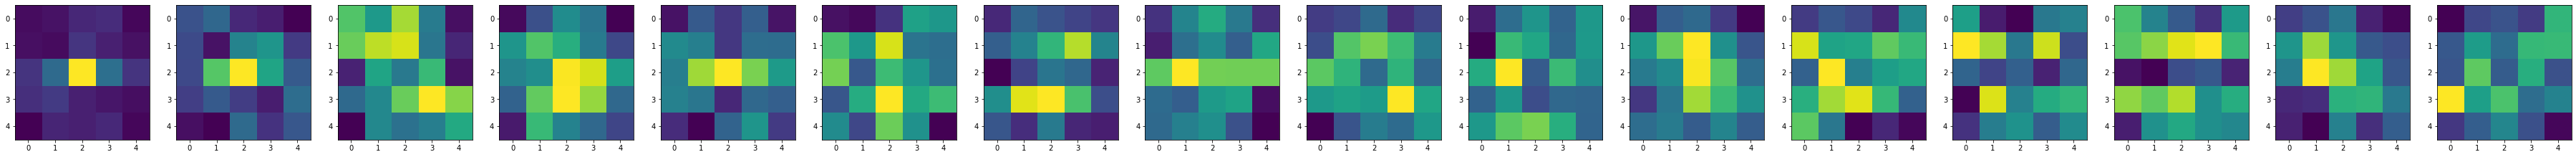

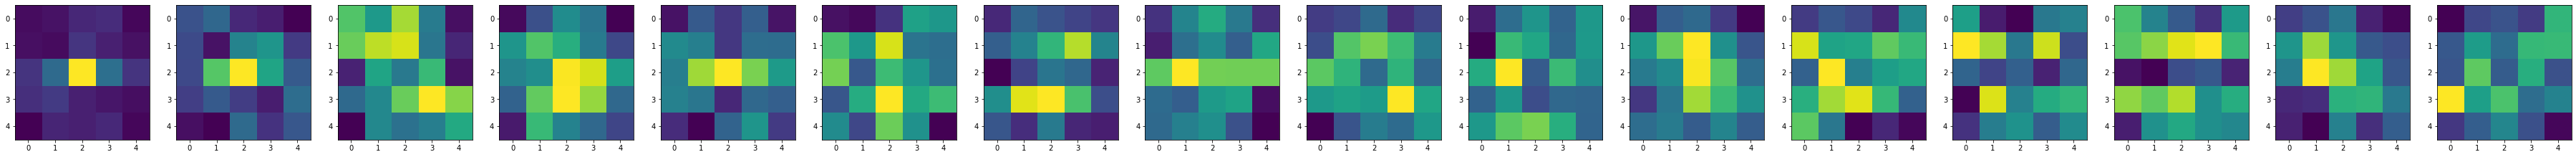

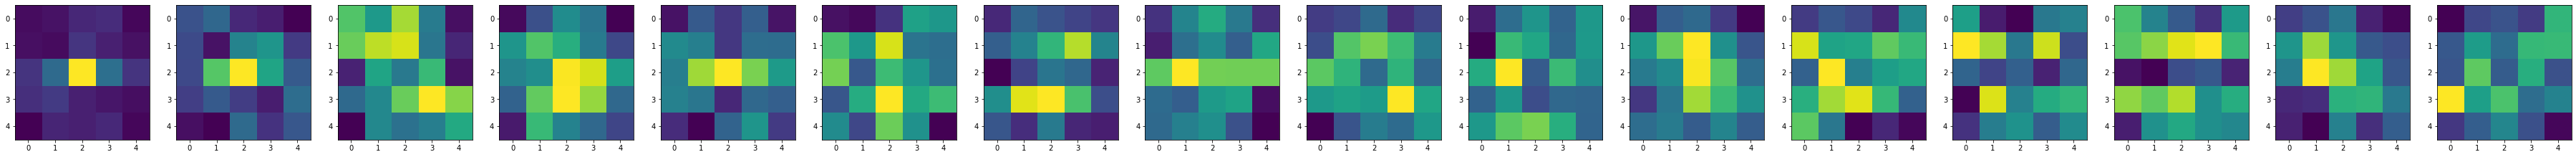

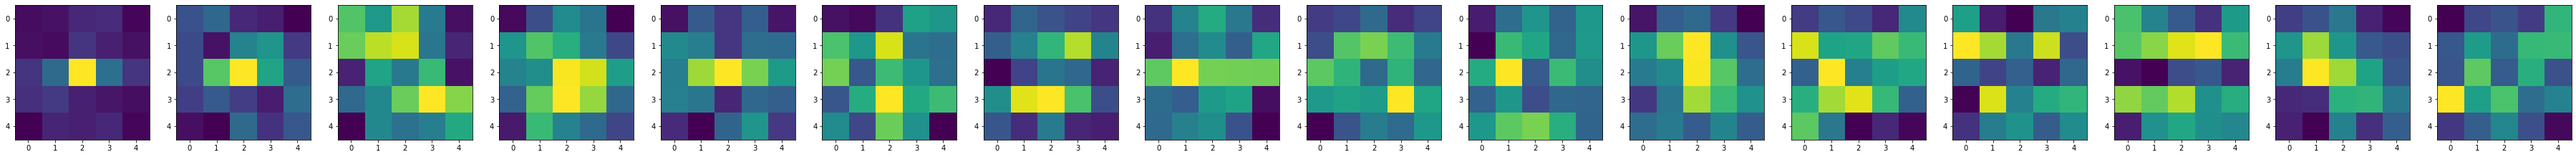

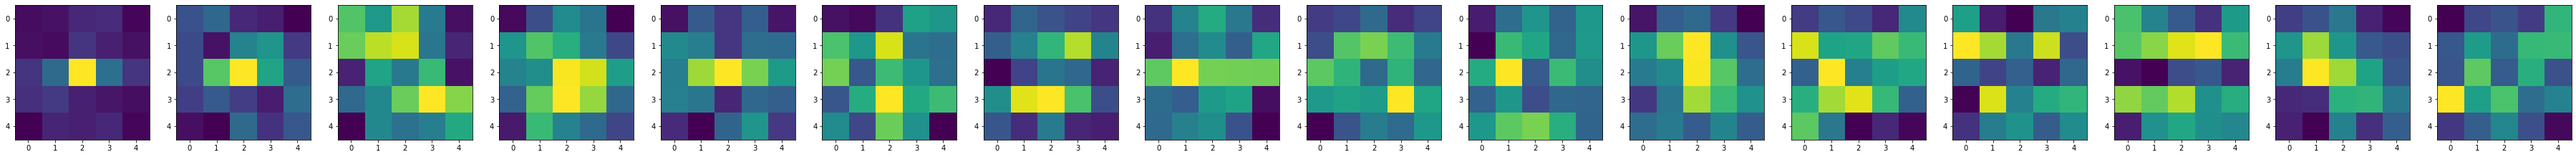

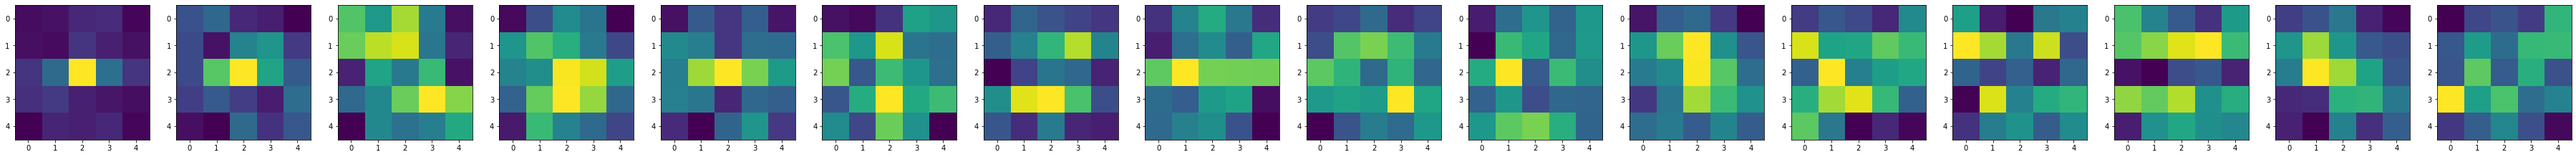

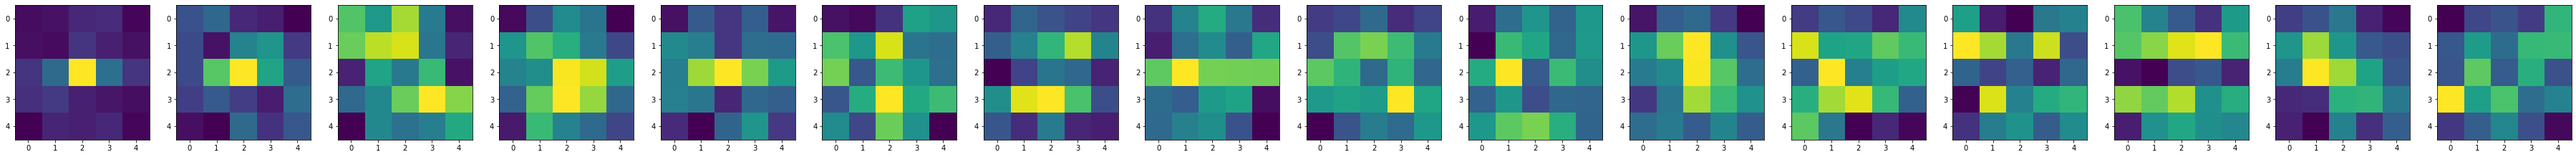

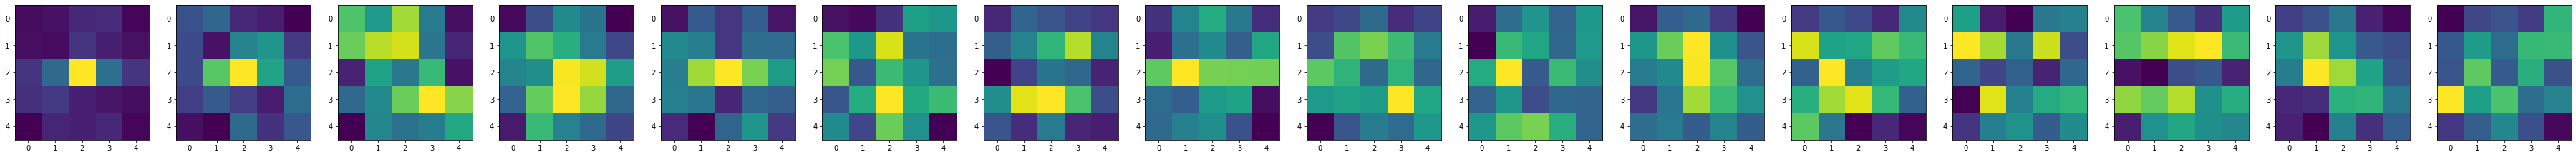

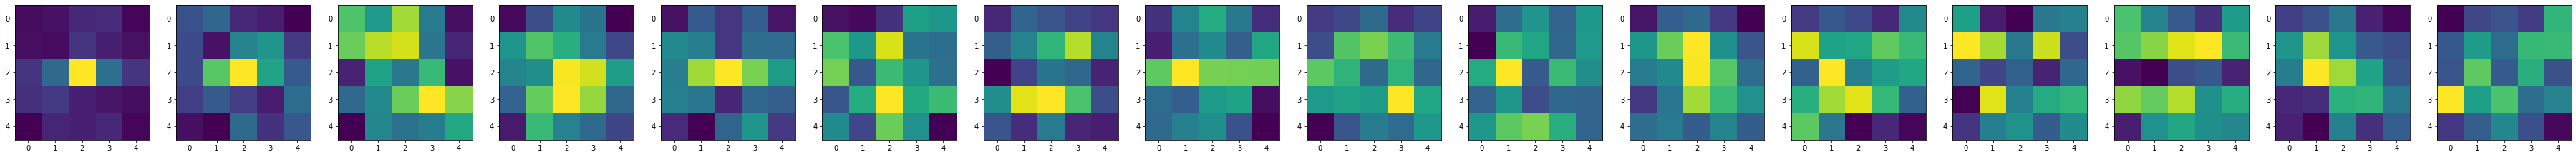

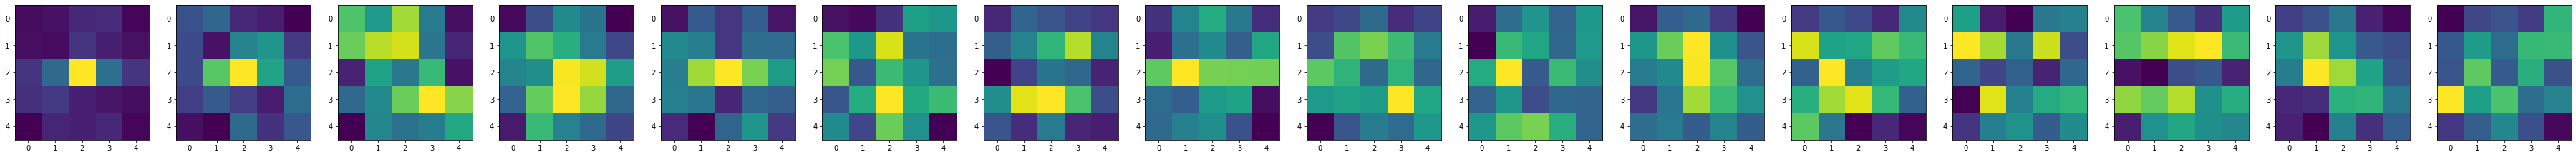

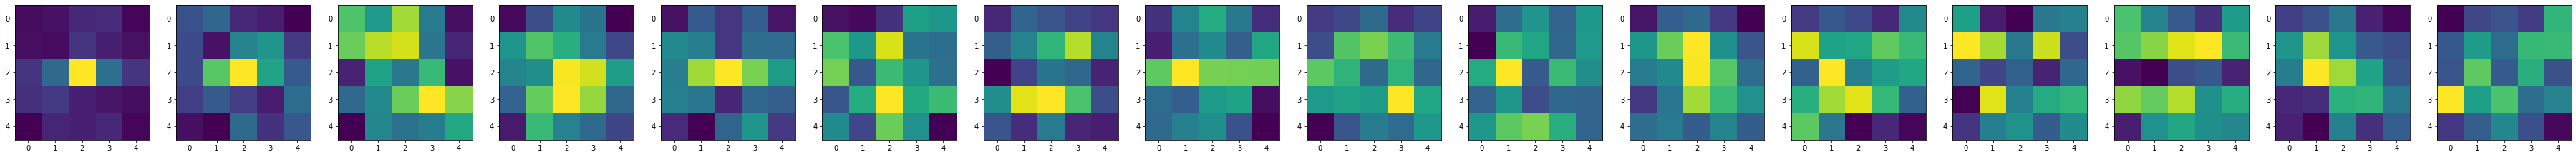

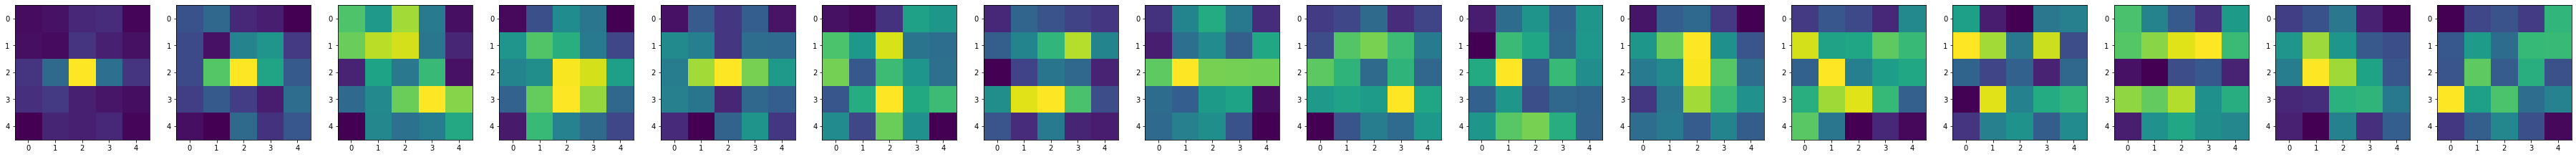

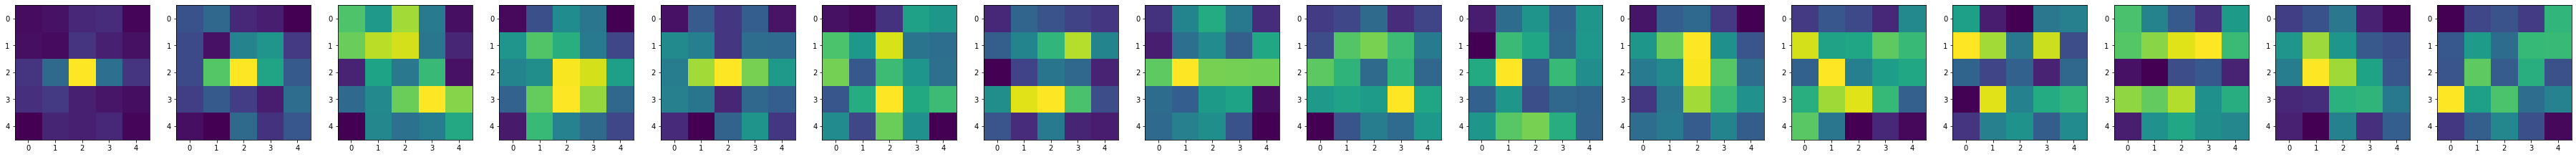

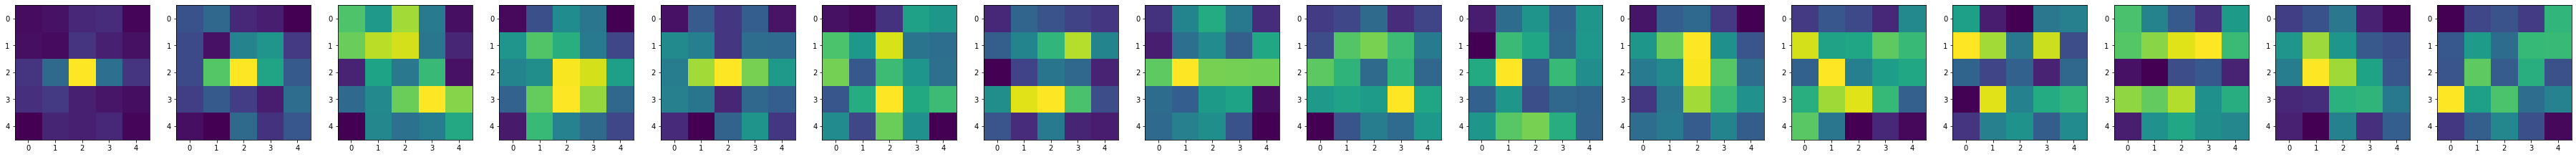

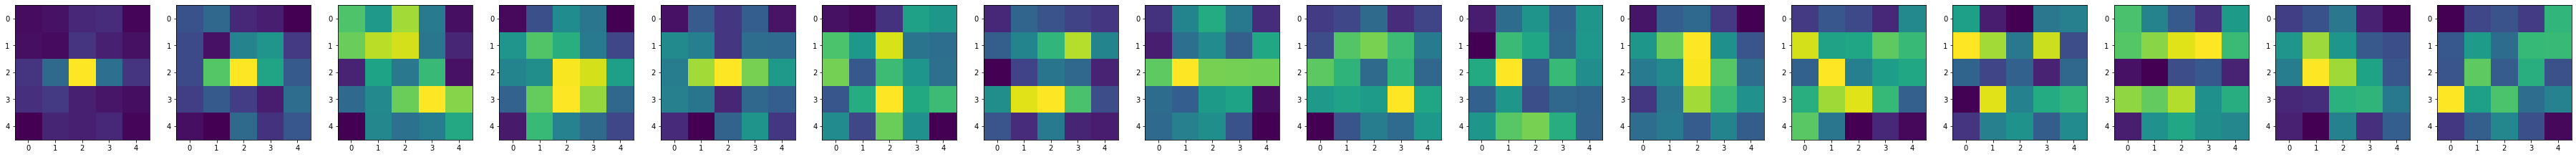

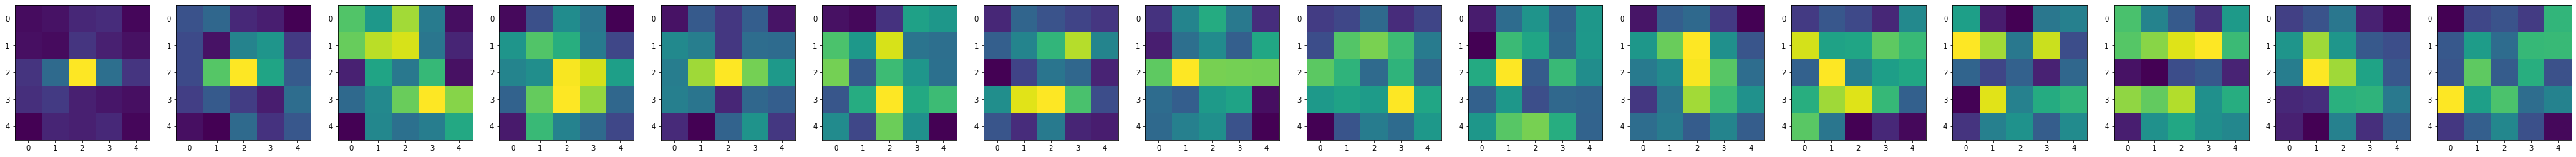

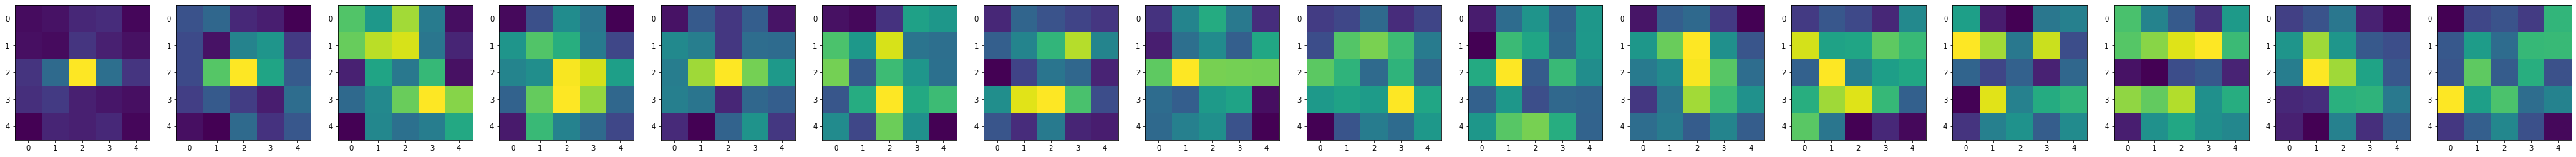

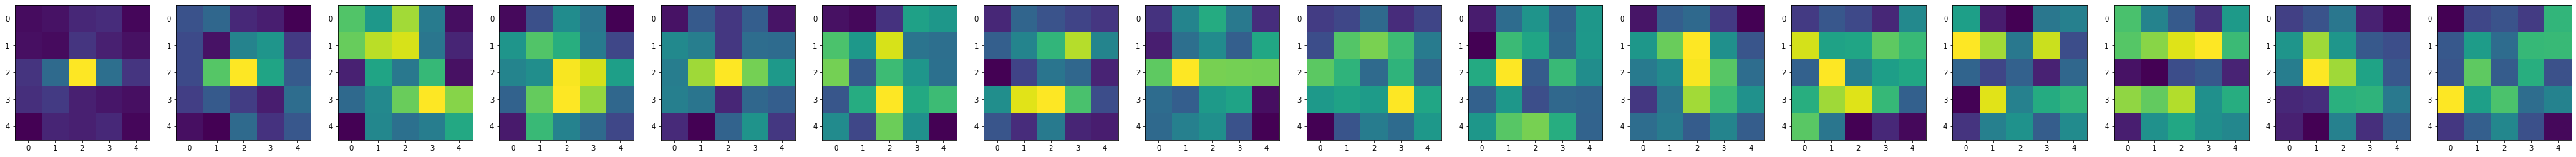

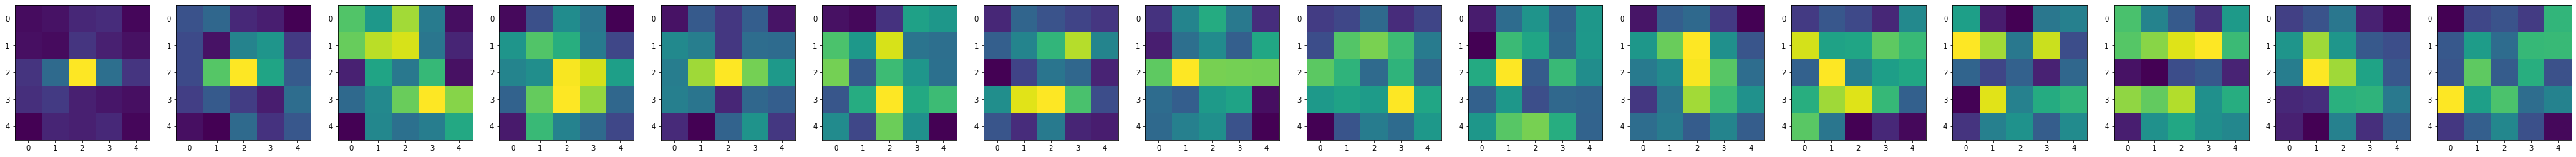

In [50]:
# shape 2048, 2048, 5, 5
num_kernels = 16
plot_scale = 4

for k in data.keys():
    fig, axs = plt.subplots(1, num_kernels, figsize=(plot_scale*num_kernels, plot_scale))
    
    for i in range(num_kernels):
        axs[i].imshow(data[k][i, 0, ...])
        
    plt.show()